<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/pytorch/pytorch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Getting Data ready

In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


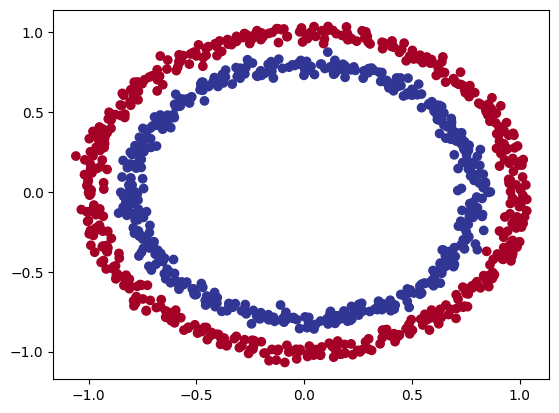

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);



In [ ]:
# dots in red are class 0 , and dots in blue are class 1 , we need a neural network to classify this correctly


In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

# so our data is in shape 1000 x 2 , while our output is a single column or 1000 x 1

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


this tells us that , for 2 inputs we have 1 output ,
i.e we have a vector with 2 features as input and a scalar as output


now we will convert our data from numpy arrays to tensors


In [9]:
import torch

In [10]:
X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

In [11]:
print(X,X.dtype,X.shape)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]]) torch.float32 torch.Size([1000, 2])


now we split our data into train and test sets


In [12]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

so now we have generated ourselves some data , see how its shape look like,
converted it from numpy arrays to tensors
and then split it into test and train datasets

#  2.Building a model


1.Setting up device agnostic code (so our model can run on CPU or GPU if it's available).

2.Constructing a model by subclassing nn.Module.

3.Defining a loss function and optimizer.


In [13]:
import torch
from torch import nn

In [14]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

now we create a NN , such that it has 2 linear layers

now obviously our # of features are 2 , and our label is a scalar

so we want a NN that takes in 2 inputs and gives us 1 output ,

so basically the in_features=2 (input of first layer)

and the out_features=1(output of last layer)

In [15]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super ().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.lin_layer_1=nn.Linear(in_features=2,out_features=5)  # takes in 2 features (X), produces 5 features
    self.lin_layer_2=nn.Linear(in_features=5,out_features=1)  # takes in 5 features, produces 1 feature (y)

  # 3. Define a forward method containing the forward pass computation
  def forward(self,x):
    # Return the output of layer_2, a single feature, the same shape as y

    return self.lin_layer_2(self.lin_layer_1(x))  # computation goes through layer_1 first then the output of layer_1 goes through layer_2


# 4. Create an instance of the model and send it to target device
model_v0=CircleModelV0().to(device)
model_v0


CircleModelV0(
  (lin_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (lin_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# # Replicate CircleModelV0 with nn.Sequential
# model_v0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_v0


# nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

# So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

now as we have always been doing , after we create a model

we will try to pass some data through it

to see that the ouput is in the correct shape and etc

In [18]:
trash_pred=model_v0(X_test.to(device))
print(f"the trash_pred has length: {len(trash_pred)} and its shape is:{trash_pred.shape}")
print(f"the y_test has length :{len(y_test)} and its shape is:{y_test.shape}")
print(f"first 10 trash_pred are {trash_pred[:10]}")
print(f"first 10 y_test are {y_test[:10]}")

the trash_pred has length: 200 and its shape is:torch.Size([200, 1])
the y_test has length :200 and its shape is:torch.Size([200])
first 10 trash_pred are tensor([[-0.5511],
        [-0.4904],
        [-0.4414],
        [-0.5833],
        [-0.0146],
        [ 0.0192],
        [-0.1481],
        [-0.0277],
        [-0.4595],
        [-0.4816]], grad_fn=<SliceBackward0>)
first 10 y_test are tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


so it seems like our output has an extra dimension

we will try to fix this later

first now try to set the loss function and optimiser

PyTorch has two binary cross entropy implementations:

torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

since we are doing a classifcation problem

we will try to set up BCE(binary cross entropy loss)

and we use the BCE that has the sigmoid layer applied automatically ,it is more stable than doing BCE LOSS and then applying the sigmoid layer manually

and for optimiser lets use SGD(stochastic gradient descent)

In [19]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in

loss_fnc=torch.nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimiser=torch.optim.SGD(params=model_v0.parameters(),lr=0.1)

# what are the parameters , that we are putting in our optimiser function

In [20]:
model_v0.parameters()

# this does not give us a hint

<generator object Module.parameters at 0x7b14b0c90820>

the parameters we are trying to predict are the weights and biases for each neuron in each of our layer

[see visualisation](https://playground.tensorflow.org/)

total parameters = (5 x 2) + 5 + (1 x 5) + 1 =21

so weights for first layer = 5 x 2=10
so bias for first layer = 5
so weights for second layer = 5 x 1=5
so bias for second layer = 1

In [21]:
# using this we can see the parameters
for name, param in model_v0.named_parameters():
    print(f"Name: {name}, Shape: {param.shape}")


Name: lin_layer_1.weight, Shape: torch.Size([5, 2])
Name: lin_layer_1.bias, Shape: torch.Size([5])
Name: lin_layer_2.weight, Shape: torch.Size([1, 5])
Name: lin_layer_2.bias, Shape: torch.Size([1])


Now let's also create **an evaluation metric.**

An evaluation metric can be used to offer another perspective on how your model is going.

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.

lets take for eg our evaluation metric as the accuracy

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

In [22]:
# Calculate accuracy (a classification metric)

def accuracy_fnc(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()  # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_true)) * 100
  return acc

**SOME CORRECTIONS**

now we are over with step 2 , lets train our model , but before that lets correct something , remember our output of the model_v0 did not have the correct shape or dimensions as our actual correct values ,

In [23]:
trash_pred.squeeze()[:10]

tensor([-0.5511, -0.4904, -0.4414, -0.5833, -0.0146,  0.0192, -0.1481, -0.0277,
        -0.4595, -0.4816], grad_fn=<SliceBackward0>)

so this solves our issue of the dimension , but notice how we have random numbers , while our true labels are 0 or 1

In [24]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

-what you read below is something you have gone through in week 9 of MLT

-basically its logistic regression ,

-logistic is other name for the sigmoid function and why regression when we are doing a classifcation problem its because the output iT gives us is a continuous number basically its the probability of each data point belonging to a class , higher the probability higher the chances of that data point belonging to class 1 ,

-it is used for models where the decision boundary is linear

so for eg if we had the data point with y=0.0302, and another one with -0.1221 , then there probabilities can be calculated using the formula , just put the data points in the formula instead of x

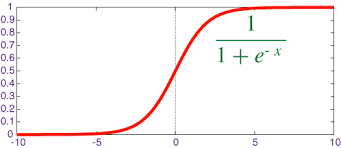

so for first point we would get probability as 0.50754

and for the second data point we would get the probability as 0.46951

so the first point has more probability of belonging to class 1 than the point 2

we can make this more specific

that is if the probability we get is more than 0.5 then we can round it off to 1 , that is the class of that point

and if its less than than 0.5 we round it to 0 ,

that us one way of saying that if the points prob is greater than 0.5 we predict the point to be of class 1 , and if its less than 0.5 then we say it belongs to class 0

In [25]:
# so basically what our model outputs without any modifcations is called logits
# the raw outputs of our model are called logits
y_logits = model_v0(X_test.to(device))
y_logits[:5]

tensor([[-0.5511],
        [-0.4904],
        [-0.4414],
        [-0.5833],
        [-0.0146]], grad_fn=<SliceBackward0>)

so right now we are getting random numbers , but if we pass this through a sigmoid activation function , it will map everyhting between 0 and 1, and that will the probability of each data point belonging to the class 0 or 1


In [26]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3656],
        [0.3798],
        [0.3914],
        [0.3582],
        [0.4964]], grad_fn=<SliceBackward0>)

notice how the first 2 probabilities are similar to what we calculated using the function , so now we know how the function works under the hood

now we just round of these probabilities

If y_pred_probs >= 0.5, y=1 (class 1)

If y_pred_probs < 0.5, y=0 (class 0)

In [27]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)
y_preds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)

In [30]:
# In full
y_pred_labels = torch.round(torch.sigmoid(model_v0(X_test.to(device))))

In [31]:
y_pred_labels.squeeze()[:5]

tensor([0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)

so now our models predictions are in the same form as our original labels

To recap, we converted our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them.

Note: The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the softmax activation function (this will come later on).

And the use of the sigmoid activation function is not required when passing our model's raw outputs to the nn.BCEWithLogitsLoss (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

so as we had use nn.BCEWithLogitsLoss , we dont need to the sigmoid activation as that loss works with the raw output of out model and has an inbuilt sigmoid function

# 3.Train Model

so now we create a training and testing loop for 100 epochs

In [32]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_v0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_v0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fnc(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fnc(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimiser.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimiser.step()

    ### Testing
    model_v0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_v0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fnc(test_logits,
                            y_test)
        test_acc = accuracy_fnc(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71106, Accuracy: 41.88% | Test loss: 0.70846, Test acc: 45.00%
Epoch: 10 | Loss: 0.70272, Accuracy: 48.12% | Test loss: 0.70100, Test acc: 47.00%
Epoch: 20 | Loss: 0.69939, Accuracy: 49.38% | Test loss: 0.69818, Test acc: 46.00%
Epoch: 30 | Loss: 0.69771, Accuracy: 50.50% | Test loss: 0.69692, Test acc: 46.50%
Epoch: 40 | Loss: 0.69667, Accuracy: 50.38% | Test loss: 0.69623, Test acc: 45.50%
Epoch: 50 | Loss: 0.69594, Accuracy: 50.38% | Test loss: 0.69581, Test acc: 46.00%
Epoch: 60 | Loss: 0.69538, Accuracy: 50.00% | Test loss: 0.69552, Test acc: 48.50%
Epoch: 70 | Loss: 0.69494, Accuracy: 50.00% | Test loss: 0.69532, Test acc: 49.00%
Epoch: 80 | Loss: 0.69458, Accuracy: 49.75% | Test loss: 0.69517, Test acc: 50.50%
Epoch: 90 | Loss: 0.69430, Accuracy: 49.62% | Test loss: 0.69507, Test acc: 52.00%



Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy)

# 4.Evaluating how our model fails

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import plot_predictions() which we wrote in notebook 01 to use later.

In [33]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

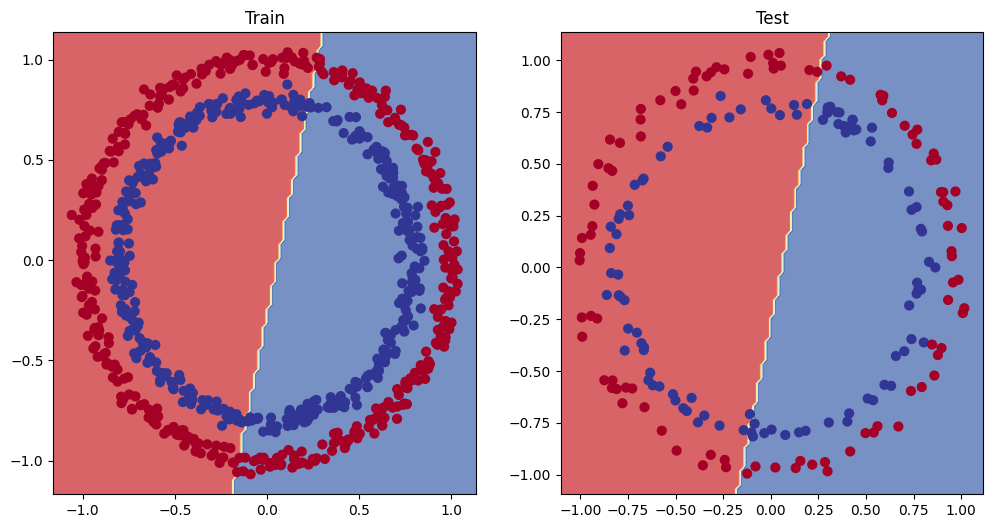

In [34]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_v0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_v0, X_test, y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

How could we improve this?

# 5.Improving Our Model

Now there can be many reasons our model fails

Model improvement technique*

**ADD MORE LAYERS**
Each layer potentially increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making your neural network deeper.


**Add more hidden units**	Similar to the above, more hidden units per layer means a potential increase in learning capabilities of the model. More hidden units are often referred to as making your neural network wider.


**Fitting for longer (more epochs)**	Your model might learn more if it had more opportunities to look at the data.


**Changing the activation functions**	Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint).


**Change the learning rate**	Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough.

**Change the loss function**	Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem.

**Use transfer learning**	Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in notebook 06.

Let's see what happens if we add an extra layer to our model, fit for longer (epochs=1000 instead of epochs=100) and increase the number of hidden units from 5 to 10.

In [36]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [38]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fnc(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fnc(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69252, Test acc: 50.50%
Epoch: 100 | Loss: 0.69325, Accuracy: 47.88% | Test loss: 0.69283, Test acc: 51.00%
Epoch: 200 | Loss: 0.69309, Accuracy: 49.88% | Test loss: 0.69344, Test acc: 46.50%
Epoch: 300 | Loss: 0.69303, Accuracy: 50.50% | Test loss: 0.69384, Test acc: 47.50%
Epoch: 400 | Loss: 0.69300, Accuracy: 51.38% | Test loss: 0.69412, Test acc: 46.50%
Epoch: 500 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69431, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69444, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69452, Test acc: 45.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69458, Test acc: 44.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69461, Test acc: 45.00%


What? Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

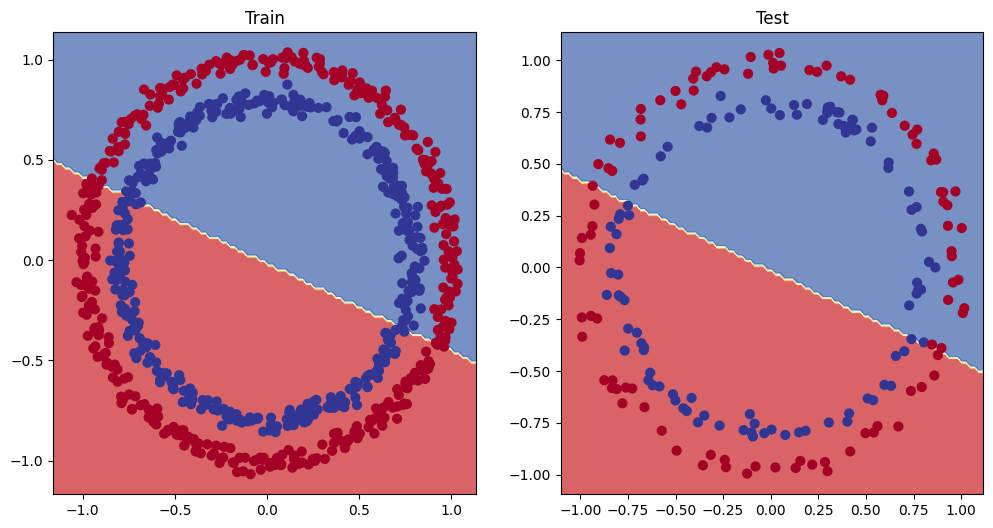

In [39]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Hmmm.

Our model is still drawing a straight line between the red and blue dots.

If our model is drawing a straight line, could it model linear data? Like we did in notebook 01?

In [40]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [41]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


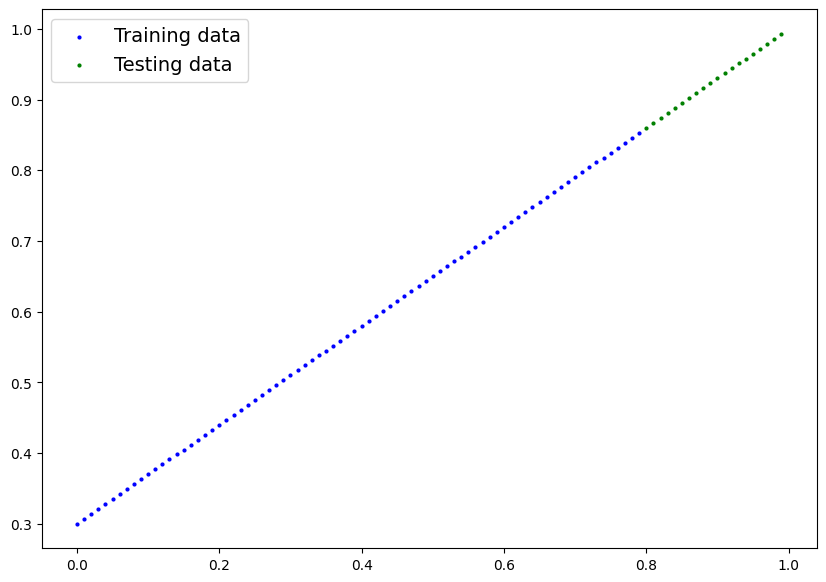

In [42]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [44]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
# Loss and optimizer
loss_fn = nn.L1Loss() #mean absolute error
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [46]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.86866, Test loss: 0.49113
Epoch: 100 | Train loss: 0.07695, Test loss: 0.32466
Epoch: 200 | Train loss: 0.04995, Test loss: 0.14866
Epoch: 300 | Train loss: 0.07683, Test loss: 0.17396
Epoch: 400 | Train loss: 0.05364, Test loss: 0.17281
Epoch: 500 | Train loss: 0.05112, Test loss: 0.14090
Epoch: 600 | Train loss: 0.05578, Test loss: 0.14578
Epoch: 700 | Train loss: 0.07648, Test loss: 0.12788
Epoch: 800 | Train loss: 0.07337, Test loss: 0.10672
Epoch: 900 | Train loss: 0.05747, Test loss: 0.13638


Okay, unlike model_1 on the classification data, it looks like model_2's loss is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target device, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using .cpu() when we pass it to plot_predictions().

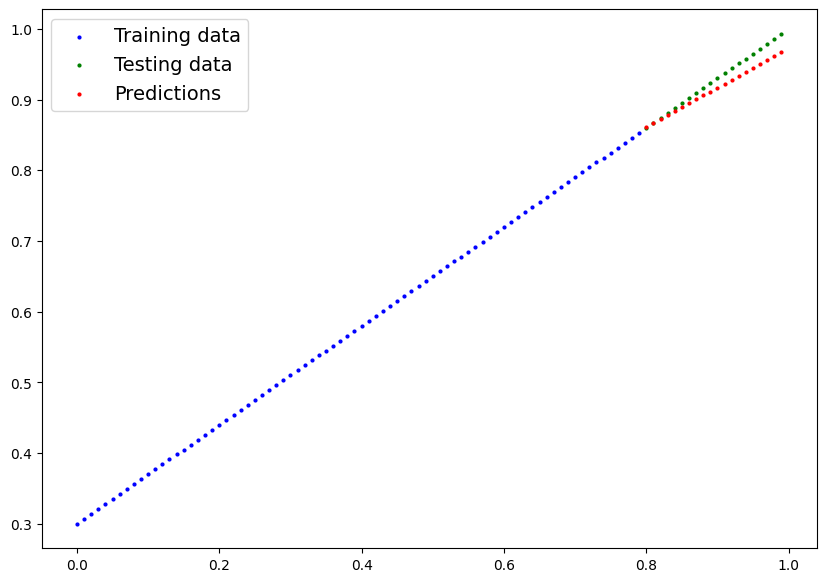

In [47]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Alright, it looks like our model is able to do far better than random guessing on straight lines.

This is a good thing.

It means our model at least has some capacity to learn.

Note: A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up.

This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then overfitting (making the model perform too well) on that small example before increasing the amount of data or the model size/design to reduce overfitting.

# 6.The missing piece- NON-LINEARITY

so not only do we add a non-linear activation function RELU between each linear layer , we also increase the epochs and make our model more wide(inc neurons) and deep(more layers)

In [66]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=512)
        self.layer_3 = nn.Linear(in_features=512, out_features=10)
        self.layer_4 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function


    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [62]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [63]:
# Fit the model
torch.manual_seed(42)
epochs = 3000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fnc(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fnc(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69321, Accuracy: 50.00% | Test Loss: 0.69305, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.68681, Accuracy: 58.38% | Test Loss: 0.68558, Test Accuracy: 57.50%
Epoch: 200 | Loss: 0.67397, Accuracy: 61.25% | Test Loss: 0.67103, Test Accuracy: 62.50%
Epoch: 300 | Loss: 0.64400, Accuracy: 68.50% | Test Loss: 0.63836, Test Accuracy: 67.00%
Epoch: 400 | Loss: 0.54918, Accuracy: 83.62% | Test Loss: 0.54219, Test Accuracy: 87.00%
Epoch: 500 | Loss: 0.43827, Accuracy: 83.38% | Test Loss: 0.48706, Test Accuracy: 67.00%
Epoch: 600 | Loss: 0.46533, Accuracy: 67.25% | Test Loss: 0.45785, Test Accuracy: 67.00%
Epoch: 700 | Loss: 0.14975, Accuracy: 99.50% | Test Loss: 0.16866, Test Accuracy: 97.50%
Epoch: 800 | Loss: 1.30558, Accuracy: 50.12% | Test Loss: 0.50512, Test Accuracy: 71.50%
Epoch: 900 | Loss: 0.03461, Accuracy: 100.00% | Test Loss: 0.05220, Test Accuracy: 99.50%
Epoch: 1000 | Loss: 0.02021, Accuracy: 100.00% | Test Loss: 0.03524, Test Accuracy: 99.50%
Epoch: 1100 | Loss: 

In [64]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

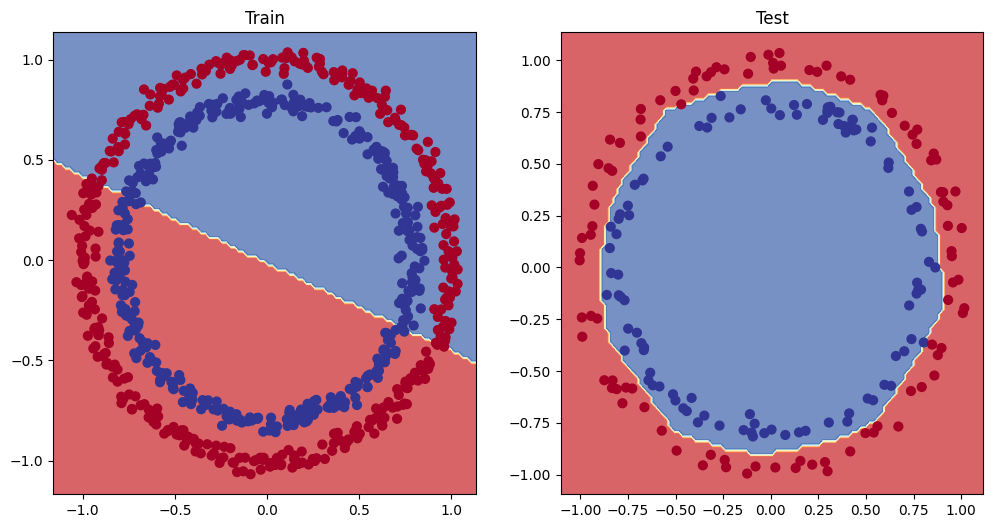

In [65]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

# 7.RELU and Sigmoid by hand

In [67]:
def RELU(x):
  return torch.maximum(torch.tensor(0),x)

In [68]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

In [69]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

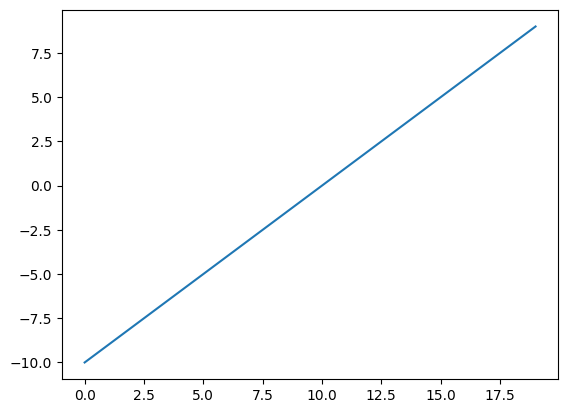

In [70]:
# Visualize the toy tensor
plt.plot(A);

In [71]:
# Pass toy tensor through ReLU function
RELU(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

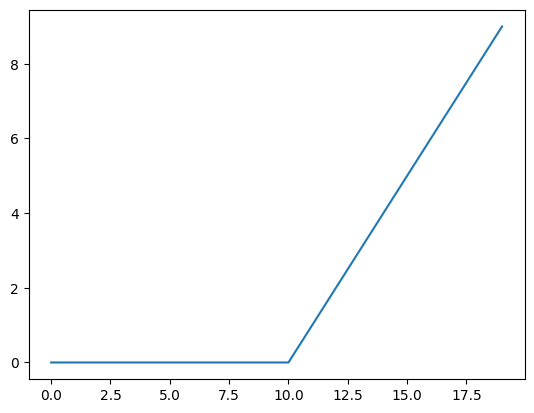

In [72]:

# Plot ReLU activated toy tensor
plt.plot(RELU(A));

In [73]:
# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

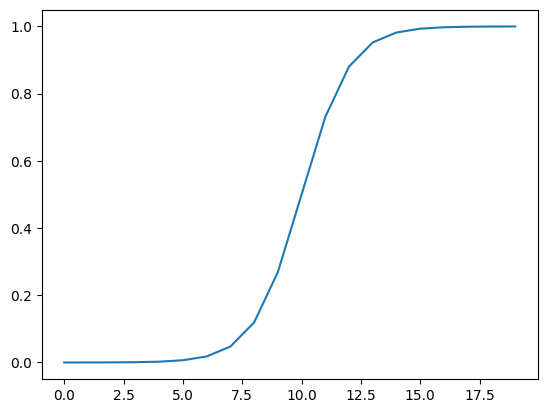

In [74]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

# 8.Multi Class PyTorch Model

first we generate some multi-class data , using Scikit-learns `make_blobs() `method

Specifically, let's do the following:

Create some multi-class data with `make_blobs()`.
Turn the data into tensors (the default of` make_blobs()` is to use NumPy arrays).
Split the data into training and test sets using `train_test_split()`.
Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


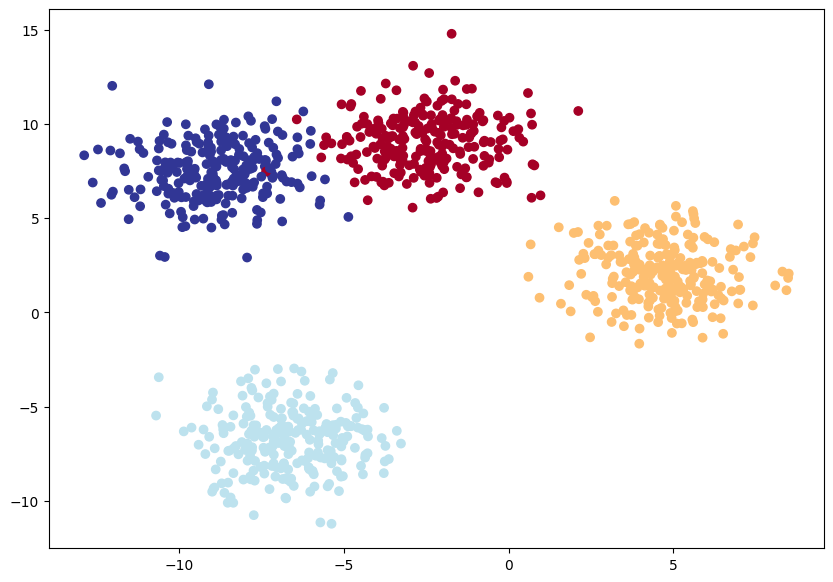

In [75]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [76]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

Since we're working on a multi-class classification problem, we'll use the nn.CrossEntropyLoss() method as our loss function.

In [77]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [78]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.1009,  0.0535,  0.0384,  0.1158],
        [ 0.2666, -0.1574,  0.4303,  0.2873],
        [-0.1518, -0.0499, -0.6090,  0.5689],
        [ 0.0141, -0.1187, -0.2551,  0.3541],
        [ 0.2749, -0.1457,  0.4133,  0.2845]], grad_fn=<SliceBackward0>)

What's coming out here?

It looks like we get one value per feature of each sample.

Let's check the shape to confirm.

In [79]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [80]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.1075,  0.0162,  0.0300,  0.1261],
        [ 0.3170, -0.0980,  0.7685,  0.3638],
        [-0.1306, -0.1246, -0.5772,  0.5179],
        [ 0.0363, -0.0144, -0.0295,  0.0862],
        [ 0.2452, -0.1375,  0.2752,  0.2545]], grad_fn=<SliceBackward0>)
tensor([[0.2593, 0.2366, 0.2399, 0.2641],
        [0.2337, 0.1543, 0.3671, 0.2449],
        [0.2194, 0.2207, 0.1404, 0.4196],
        [0.2539, 0.2414, 0.2378, 0.2669],
        [0.2687, 0.1832, 0.2769, 0.2712]], grad_fn=<SliceBackward0>)


After passing the logits through the softmax function, each individual sample now adds to 1 (or very close to).

Let's check.

In [81]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

These prediction probabilities are essentially saying how much the model thinks the target X sample (the input) maps to each class.

We can check which index has the highest value using `torch.argmax()`.

In [82]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2593, 0.2366, 0.2399, 0.2641], grad_fn=<SelectBackward0>)
tensor(3)


Note: To summarize the above, a model's raw output is referred to as logits.

For a multi-class classification problem, to turn the logits into prediction probabilities, you use the softmax activation function (torch.softmax).

The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

In [83]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fnc(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fnc(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.49692, Acc: 12.12% | Test Loss: 1.41791, Test Acc: 12.50%
Epoch: 10 | Loss: 0.85832, Acc: 74.25% | Test Loss: 0.79214, Test Acc: 75.50%
Epoch: 20 | Loss: 0.45039, Acc: 75.00% | Test Loss: 0.43510, Test Acc: 75.50%
Epoch: 30 | Loss: 0.35745, Acc: 77.75% | Test Loss: 0.35663, Test Acc: 78.50%
Epoch: 40 | Loss: 0.31646, Acc: 83.00% | Test Loss: 0.31723, Test Acc: 84.50%
Epoch: 50 | Loss: 0.27786, Acc: 89.75% | Test Loss: 0.27627, Test Acc: 94.00%
Epoch: 60 | Loss: 0.22126, Acc: 96.75% | Test Loss: 0.21523, Test Acc: 98.50%
Epoch: 70 | Loss: 0.14679, Acc: 99.00% | Test Loss: 0.13862, Test Acc: 99.50%
Epoch: 80 | Loss: 0.09305, Acc: 99.12% | Test Loss: 0.08598, Test Acc: 100.00%
Epoch: 90 | Loss: 0.06685, Acc: 99.12% | Test Loss: 0.06029, Test Acc: 100.00%


In [84]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 0.8962,  5.9879, -2.2661, -3.5349],
        [ 3.3973, -3.6866, -2.5905,  6.5474],
        [-0.8089, -1.0735,  7.9806, -3.5154],
        [-0.1244,  4.5916, -1.9167, -2.7551],
        [ 5.3101,  1.3880, -0.7602, -0.6246],
        [ 3.6708, -4.6355, -3.1396,  8.1866],
        [-0.8082, -0.9811,  8.0173, -3.7205],
        [ 4.9765,  0.0626, -0.9928,  1.0714],
        [-1.4667, -2.5053,  8.2745, -1.9078],
        [ 5.0638,  0.6480, -0.8678,  0.2882]])

In [85]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fnc(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 100.0%


Nice! Our model predictions are now in the same form as our test labels.

Let's visualize them with plot_decision_boundary(), remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (plot_decision_boundary() does this automatically for us).

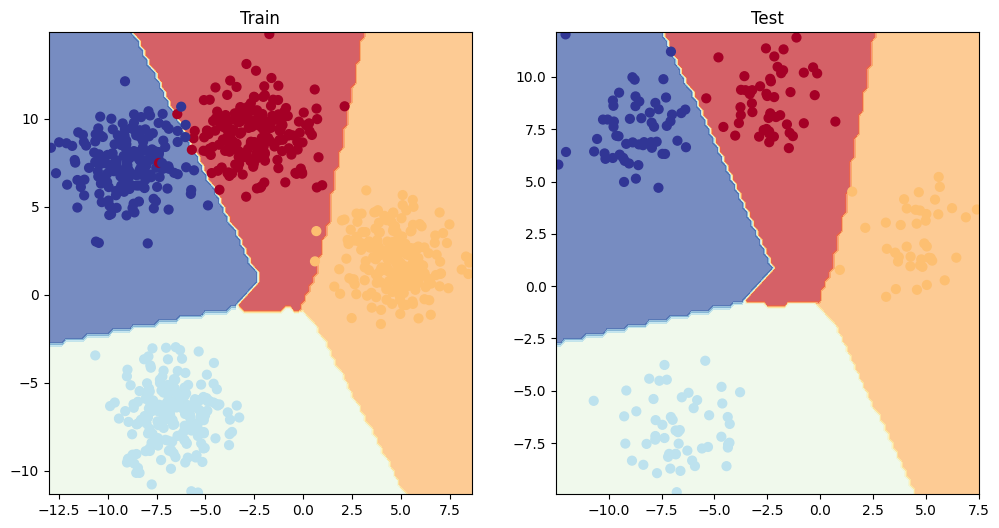

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# 9.Some more classification metrics

In [87]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 7.5 MB/s eta 0:00:00


tensor(1.)